In [1]:
%load_ext autoreload
%autoreload 2

import IPython
from pathlib import Path
import os
locals = IPython.extract_module_locals() # type: ignore
notebook_name = "/".join(locals[1]["__vsc_ipynb_file__"].split("/"))
os.chdir(Path(notebook_name).parent.parent)

# **1. Train MF model using only the users and items IDs and the relations data.**

In [2]:
import json
import tempfile
import os


device = "cpu"
data = {
    "data": {
        "dataset": "hm",
        "prefix": "sep_2020"
    },
    "train": {
        "epochs": 20,
        "valid_size": 0.3,
        "batch_size": 256,
        "train_print_every": 100,
        "eval_batch_size": 1,
        "eval_user_batch_size": 1024,
        "eval_print_every": 1,
        "neg_sampl": 20,
        "lr": 1e-2
    },
    "model": {
        "model_type": "MF",
        "model_config": {
            "emb_size": 16,
            "dropout": 0.2
        }
    }
}

temp_file = tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.json')
json.dump(data, temp_file)
temp_file.close()

config_path = temp_file.name

In [3]:
!python -m retail_recommender_system.scripts.train --config {config_path} --device {device}

2025-01-17 23:17:08,511 - retail_recommender_system.utils - INFO - Setting seed to 0
2025-01-17 23:17:08,551 - retail_recommender_system.trainer.loader - INFO - Model configuration:
{
  "model_type": "<class 'retail_recommender_system.models.mf.MF'>",
  "model_config": {
    "emb_size": 16,
    "dropout": 0.2
  }
}
2025-01-17 23:17:08,551 - retail_recommender_system.trainer.loader - INFO - Train configuration:
{
  "valid_size": 0.3,
  "batch_size": 256,
  "train_print_every": 100,
  "eval_batch_size": 1,
  "eval_user_batch_size": 1024,
  "eval_print_every": 1,
  "neg_sampl": 20,
  "lr": 0.01,
  "epochs": 20
}
/Users/miloszhanczyk/Documents/uv/MOW_2/lab/retail_recommender_system/retail_recommender_system/models/mf.py:32: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a t

In [4]:
os.remove(temp_file.name)

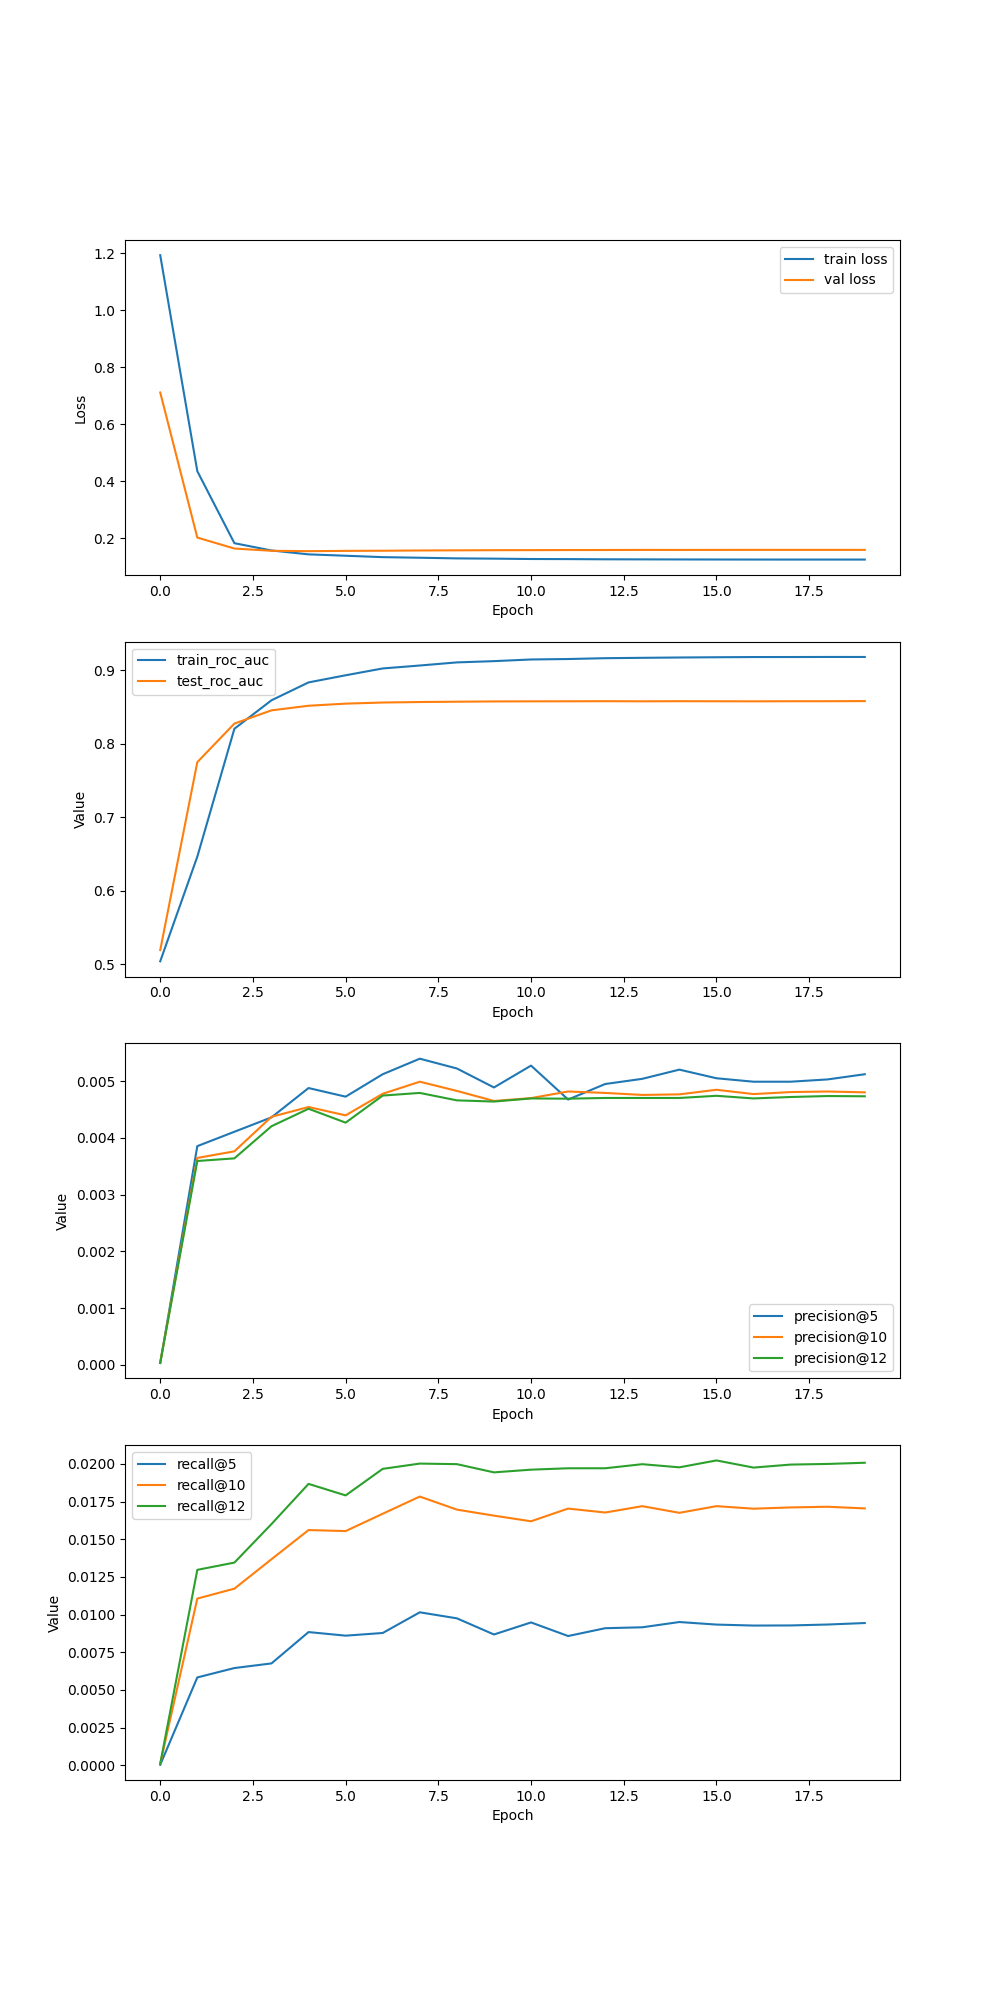

In [5]:
from IPython.display import Image

run_id = "2025-01-17_23-23-21"

with open(f".runs/MF/{run_id}/history_log.json") as f:
    history = json.load(f)
    
image_path = f".runs/MF/{run_id}/history_plot.png"
display(Image(filename=image_path))

In [6]:
print(json.dumps(history, indent=2))

{
  "train_loss": [
    1.193138075454009,
    0.4355726803779717,
    0.18292345194044796,
    0.15740632421698578,
    0.14372373650055656,
    0.13890443450559384,
    0.13398398918750598,
    0.13189450038588924,
    0.12961031025980688,
    0.12869701435598632,
    0.12742127371685846,
    0.12706639340658954,
    0.12641929724343756,
    0.1261338332292551,
    0.1258873013871802,
    0.1256835040040117,
    0.12554106752407443,
    0.1254955592236879,
    0.12548372544753203,
    0.12547780042617238
  ],
  "val_loss": [
    0.7115553985000128,
    0.20260300531453296,
    0.16420547846748895,
    0.15626013119936932,
    0.1549495026292537,
    0.15597230708410617,
    0.15643059129535916,
    0.15736584724644898,
    0.15785049897408768,
    0.15840448150521683,
    0.15856491842053153,
    0.15891596863392313,
    0.15902244797337198,
    0.1593330281643057,
    0.15923243437124335,
    0.15937981250964606,
    0.15955761381288763,
    0.1594847711649808,
    0.159533054520018

# **2. Train MFConv model using the relations data, users IDs, items IDs and item images.**

In [7]:
import json
import tempfile
import os


device = "mps"
data = {
    "data": {
        "dataset": "hm",
        "prefix": "sep_2020"
    },
    "train": {
        "epochs": 20,
        "valid_size": 0.3,
        "batch_size": 256,
        "train_print_every": 100,
        "eval_batch_size": 1,
        "eval_user_batch_size": 1024,
        "eval_print_every": 1,
        "neg_sampl": 20,
        "lr": 1e-2
    },
    "model": {
        "model_type": "MFConv",
        "model_config": {
            "emb_size": 32,
            "dropout": 0.2,
            "image_size": [
                3,
                128,
                128
            ]
        }
    }
}

temp_file = tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.json')
json.dump(data, temp_file)
temp_file.close()

config_path = temp_file.name

In [10]:
!python -m retail_recommender_system.scripts.train --config {config_path} --device {device}

2025-01-17 23:27:05,071 - retail_recommender_system.utils - INFO - Setting seed to 0
2025-01-17 23:27:05,087 - retail_recommender_system.trainer.loader - INFO - Model configuration:
{
  "model_type": "<class 'retail_recommender_system.models.mfconv.MFConv'>",
  "model_config": {
    "emb_size": 32,
    "dropout": 0.2,
    "image_size": [
      3,
      128,
      128
    ]
  }
}
2025-01-17 23:27:05,087 - retail_recommender_system.trainer.loader - INFO - Train configuration:
{
  "valid_size": 0.3,
  "batch_size": 256,
  "train_print_every": 100,
  "eval_batch_size": 1,
  "eval_user_batch_size": 1024,
  "eval_print_every": 1,
  "neg_sampl": 20,
  "lr": 0.01,
  "epochs": 20
}
/Users/miloszhanczyk/Documents/uv/MOW_2/lab/retail_recommender_system/retail_recommender_system/models/mfconv.py:43: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the arra

In [14]:
os.remove(temp_file.name)

In [ ]:
from IPython.display import Image

run_id = "2025-01-09_23-14-47"

with open(f".runs/MFConv/{run_id}/history_log.json") as f:
    history = json.load(f)
    
image_path = f".runs/MFConv/{run_id}/history_plot.png"
display(Image(filename=image_path))

In [ ]:
print(json.dumps(history, indent=2))

# **4. Summary (MFConv):**
-